### What You're Aiming For

In this checkpoint, we are going to work on the 'Electric Vehicle Data' dataset that was provided by Kaggle as part of the Electric Vehicle Price Prediction competition.

Dataset description: This dataset contains information on the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered with the Washington State Department of Licensing (DOL). This dataset was introduced as part of an official invitation-based competition on Kaggle. Our SVM model should answer the question "This is my car's model & make, along with a few other parameters, what price can this vehicle be brought or sold?”

➡️ Dataset link

https://i.imgur.com/IpuCW3s.jpg

➡️Columns explanation 

 


Instructions

Import you data and perform basic data exploration phase
Display general information about the dataset
Create a pandas profiling reports to gain insights into the dataset
Handle Missing and corrupted values
Remove duplicates, if they exist
Handle outliers, if they exist
Encode categorical features
Select your target variable and the features
Split your dataset to training and test sets
Build and train an SVM model on the training set
Assess your model performance on the test set using relevant evaluation metrics
Discuss with your cohort alternative ways to improve your model performance

In [5]:
import pandas as pd
from ydata_profiling import ProfileReport

In [6]:
df = pd.read_csv("Electric_cars_dataset.csv")
df.head(10)

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
0,EV33174,5YJ3E1EC6L,Snohomish,LYNNWOOD,WA,98037.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,32.0,109821694,POINT (-122.287614 47.83874),PUGET SOUND ENERGY INC,50
1,EV40247,JN1AZ0CP8B,Skagit,BELLINGHAM,WA,98229.0,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,40.0,137375528,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC,15
2,EV12248,WBY1Z2C56F,Pierce,TACOMA,WA,98422.0,2015.0,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,27.0,150627382,POINT (-122.396286 47.293138),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,18
3,EV55713,1G1RD6E44D,King,REDMOND,WA,98053.0,2013.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,45.0,258766301,POINT (-122.024951 47.670286),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),33.9
4,EV28799,1G1FY6S05K,Pierce,PUYALLUP,WA,98375.0,2019.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,25.0,296998138,POINT (-122.321062 47.103797),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,41.78
5,EV49859,KMHE24L10G,Clark,VANCOUVER,WA,98683.0,2016.0,HYUNDAI,SONATA PLUG-IN HYBRID,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,27,34600,18.0,110121371,POINT (-122.510748 45.603727),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,16.365
6,EV35778,1G1FZ6S07L,King,SEATTLE,WA,98107.0,2020.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,259,0,36.0,142015072,NaN,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),31.5
7,EV53121,5YJSA1E22G,Spokane,SPOKANE,WA,99224.0,2016.0,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,6.0,349565044,POINT (-117.505436 47.633834),MODERN ELECTRIC WATER COMPANY,65
8,EV46881,1N4BZ0CP9H,King,BOTHELL,WA,98011.0,2017.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,107,0,1.0,327624048,POINT (-122.197147 47.757791),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),19
9,EV32004,1N4BZ0CP4G,King,KENMORE,WA,98028.0,2016.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,46.0,148960990,POINT (-122.246193 47.755504),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),27


In [7]:
df.shape

(64353, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64353 entries, 0 to 64352
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 64353 non-null  object 
 1   VIN (1-10)                                         64353 non-null  object 
 2   County                                             64349 non-null  object 
 3   City                                               64344 non-null  object 
 4   State                                              64342 non-null  object 
 5   ZIP Code                                           64347 non-null  float64
 6   Model Year                                         64346 non-null  float64
 7   Make                                               64349 non-null  object 
 8   Model                                              64340 non-null  object 
 9   Electr

In [9]:
# Check for Missing Data:

df.isnull().sum()

ID                                                     0
VIN (1-10)                                             0
County                                                 4
City                                                   9
State                                                 11
ZIP Code                                               6
Model Year                                             7
Make                                                   4
Model                                                 13
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 169
DOL Vehicle ID                                         0
Vehicle Location                                     510
Electric Utility                                     722
Expected Price ($1k)           

In [10]:
df.duplicated().sum()  # Find duplicates
# There are duplicates... Cool

0

In [11]:
# Checking for missing values
missing_values = df.isnull().sum()

# Calculate percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Display missing values and their percentages
missing_data_report = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Sort by percentage of missing values
missing_data_report = missing_data_report[missing_data_report['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)
missing_data_report

,Missing Values,Percentage
Electric Utility,722,1.121937
Vehicle Location,510,0.792504
Legislative District,169,0.262614
Model,13,0.020201
State,11,0.017093
City,9,0.013985
Model Year,7,0.010878
ZIP Code,6,0.009324
County,4,0.006216
Make,4,0.006216


In [12]:
# Fill missing Electric Utility and Vehicle Location with 'Unknown' as a placeholder
df['Electric Utility'].fillna('Unknown', inplace=True)
df['Vehicle Location'].fillna('Unknown', inplace=True)

# Fill missing State, City, Model, Make, and Year with forward fill (use previous row's value)
df.fillna(method='ffill', inplace=True)

C:\Users\HARDEY\AppData\Local\Temp\ipykernel_9472\2830460595.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [13]:
df.shape

(64353, 18)

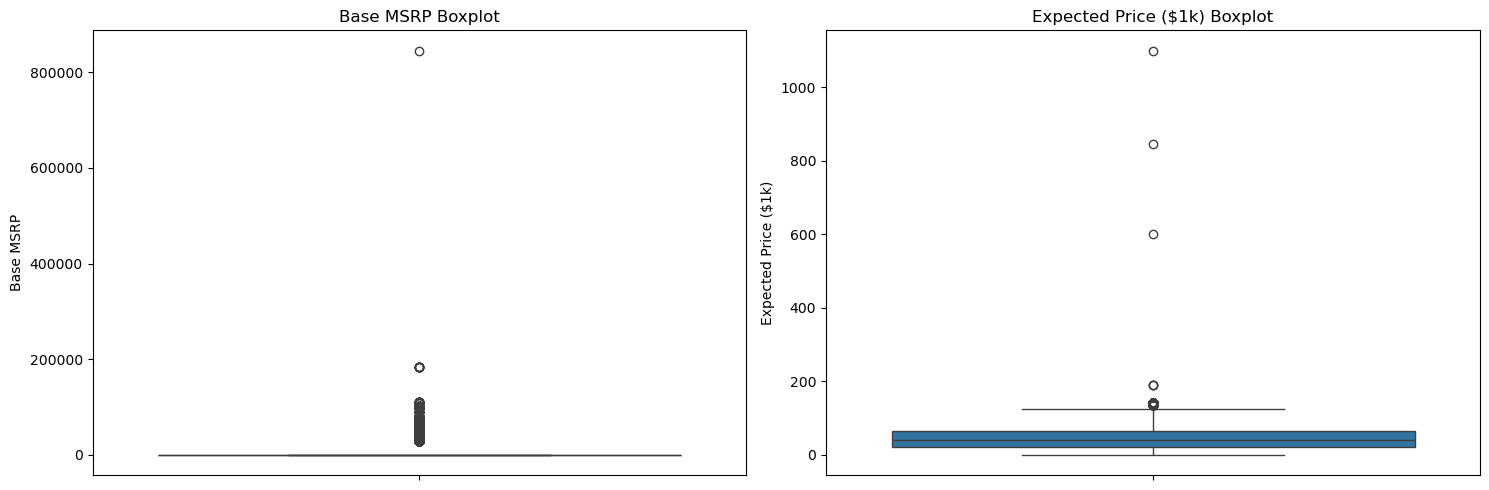

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Base MSRP boxplot
sns.boxplot(ax=axes[0], y=df['Base MSRP'])
axes[0].set_title('Base MSRP Boxplot')

# Expected Price ($1k) boxplot
sns.boxplot(ax=axes[1], y=pd.to_numeric(df['Expected Price ($1k)'], errors='coerce'))
axes[1].set_title('Expected Price ($1k) Boxplot')

plt.tight_layout()
plt.show()

In [22]:
# Ensure 'Expected Price ($1k)' is numeric
df['Expected Price ($1k)'] = pd.to_numeric(df['Expected Price ($1k)'], errors='coerce')

# Remove any rows with NaN values in 'Expected Price ($1k)' after conversion
df = df.dropna(subset=['Expected Price ($1k)'])

# Detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Detecting outliers in Base MSRP and Expected Price
base_msrp_outliers = detect_outliers_iqr(df, 'Base MSRP')
expected_price_outliers = detect_outliers_iqr(df, 'Expected Price ($1k)')

print(f"Outliers in Base MSRP: {len(base_msrp_outliers)}")
print(f"Outliers in Expected Price: {len(expected_price_outliers)}")

# Remove outliers from the dataset
df_cleaned = df[~df.index.isin(base_msrp_outliers.index)]
df_cleaned = df_cleaned[~df_cleaned.index.isin(expected_price_outliers.index)]

Outliers in Base MSRP: 3090
Outliers in Expected Price: 394


### We'll now encode categorical columns like Make, Model, and Electric Vehicle Type to numerical format for model training. The common techniques are Label Encoding or One-Hot Encoding. For SVM models, Label Encoding is preferred.

In [24]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_cols = ['Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']

# Initialize Label Encoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
for col in categorical_cols:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])

# Check the encoded dataset
df_cleaned.head()


,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
0,EV33174,5YJ3E1EC6L,Snohomish,LYNNWOOD,WA,98037.0,2020.0,25,49,0,0,308,0,32.0,109821694,POINT (-122.287614 47.83874),PUGET SOUND ENERGY INC,50.00
1,EV40247,JN1AZ0CP8B,Skagit,BELLINGHAM,WA,98229.0,2011.0,20,46,0,0,73,0,40.0,137375528,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC,15.00
2,EV12248,WBY1Z2C56F,Pierce,TACOMA,WA,98422.0,2015.0,3,39,0,0,81,0,27.0,150627382,POINT (-122.396286 47.293138),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,18.00
3,EV55713,1G1RD6E44D,King,REDMOND,WA,98053.0,2013.0,5,82,1,0,38,0,45.0,258766301,POINT (-122.024951 47.670286),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),33.90
4,EV28799,1G1FY6S05K,Pierce,PUYALLUP,WA,98375.0,2019.0,5,12,0,0,238,0,25.0,296998138,POINT (-122.321062 47.103797),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,41.78


In [26]:
# Selecting the target variable and features
target = 'Expected Price ($1k)'
features = ['Make', 'Model', 'Model Year', 'Electric Vehicle Type', 'Electric Range', 'Base MSRP']

X = df_cleaned[features]
y = pd.to_numeric(df_cleaned[target], errors='coerce')

In [28]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
X_train.shape, X_test.shape

((48685, 6), (12172, 6))

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the SVM model
svm_model = SVR(kernel='rbf', C=100, gamma='auto')
svm_model.fit(X_train_scaled, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")